In [718]:
#This code allows you to evaluate which players are the most influential for a team during the calendar year 
#using data from Understat.com we will answer the following questions:
# 1) Who are the 5 most influential players for Goal Events? (Goals + Assists)
# 2) How is the performance of the 5 most influential players during the season (Month by month and by minutes played)
# 3) From the player that scores the most: Where does he prefers to shoot and also where does he score the most goals?
# 4) Who is the best "duo" (Goals and assisted each other the most)
#Importing essential packages at this point

import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np
from datetime import datetime

In [719]:
#Webscrapping understat.com. 

#The section of code for webscrapping was created following McKay Johns youtube videos.

#scrape a single game shots. 
base_url = 'https://understat.com/team/'
match = str(input('Please enter the Team: '))
url = base_url+match+'/'+str(datetime.now().year-1)
print(url) #To make sure thing are going good

Please enter the Team: bayer_leverkusen
https://understat.com/team/bayer_leverkusen/2023


In [720]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [721]:
#get only the shotsData
strings = scripts[1].string

In [722]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [723]:
id1 = []
Played = []
for index in range(len(data)):
    for key in data[index]:
        if key == 'id':
            id1.append(data[index][key])
        if key == 'isResult':
            Played.append(data[index][key])

In [724]:
col_names = ['MatchID','Played']
MatchSetting = pd.DataFrame([id1,Played],index=col_names)
MatchSetting = MatchSetting.T
MatchSetting=MatchSetting[MatchSetting['Played']==True]
match_base_url = 'https://understat.com/match/'

MatchWeb=match_base_url+MatchSetting['MatchID']
MatchSetting['MatchWeb']=MatchWeb


#Create a list for each variable we want to take out of understat.com
x = []
y = []
xG = []
result = []
team = []
HA = []
id1 = []
player = []
player_assisted = []
shot_type = []
situation = []
minute = []
datetime = []

In [725]:
MatchSetting=MatchSetting.reset_index()
MatchSetting=MatchSetting.drop('index', axis=1)
print(MatchSetting.head())

  MatchID Played                           MatchWeb
0   23066   True  https://understat.com/match/23066
1   23080   True  https://understat.com/match/23080
2   23084   True  https://understat.com/match/23084
3   23092   True  https://understat.com/match/23092
4   23108   True  https://understat.com/match/23108


In [726]:
#Use requests to get the webpage and BeautifulSoup to parse the page

for index in range(len(MatchSetting)):
    res = requests.get(MatchSetting['MatchWeb'][index])
    soup = BeautifulSoup(res.content, 'lxml')
    scripts = soup.find_all('script')
    #get only the shotsData
    strings = scripts[1].string
    # strip unnecessary symbols and get only JSON data 
    ind_start = strings.index("('")+2 
    ind_end = strings.index("')") 
    json_data = strings[ind_start:ind_end] 
    json_data = json_data.encode('utf8').decode('unicode_escape')

    #convert string to json format
    data = json.loads(json_data)
    data_away = data['a']
    data_home = data['h']

    for index in range(len(data_home)):
        for key in data_home[index]:
            if key == 'date':
                datetime.append(data_home[index][key])
            if key == 'minute':
                minute.append(data_home[index][key])
            if key == 'match_id':
                id1.append(data_home[index][key])
            if key == 'X':
                x.append(data_home[index][key])
            if key == 'Y':
                y.append(data_home[index][key])
            if key == 'h_team':
                team.append(data_home[index][key])
            if key == 'xG':
                xG.append(data_home[index][key])
            if key == 'result':
                result.append(data_home[index][key])
            if key == 'player':
                player.append(data_home[index][key])
            if key == 'player_assisted':
                player_assisted.append(data_home[index][key])
            if key == 'h_a':
                HA.append(data_home[index][key])
            if key == 'shotType':
                shot_type.append(data_home[index][key])            
                    
    for index in range(len(data_away)):
        for key in data_away[index]:
            if key == 'date':
                datetime.append(data_away[index][key])
            if key == 'minute':
                minute.append(data_away[index][key])
            if key == 'match_id':
                id1.append(data_away[index][key])
            if key == 'X':
                x.append(data_away[index][key])
            if key == 'Y':
                y.append(data_away[index][key])
            if key == 'a_team':
                team.append(data_away[index][key])
            if key == 'xG':
                xG.append(data_away[index][key])
            if key == 'result':
                result.append(data_away[index][key])
            if key == 'player':
                player.append(data_away[index][key])
            if key == 'player_assisted':
                player_assisted.append(data_away[index][key])
            if key == 'h_a':
                HA.append(data_away[index][key])
            if key == 'shotType':
                shot_type.append(data_away[index][key])
                 

In [727]:
col_names = ['date','minute','MatchID','x','y','xG','result','team','Home_Away','player','player_assisted','Shot type']
df = pd.DataFrame([datetime,minute,id1,x,y,xG,result,team,HA,player,player_assisted,shot_type],index=col_names)
df = df.T

In [728]:
#Saving Dataframe so I don't have to webscape the data in the future
df.to_csv('C:/Users/verde/Desktop/data/'+match+'.csv', index=False) 

#Re-opening it
df = pd.read_csv('C:/Users/verde/Desktop/data/'+match+'.csv')
df.head()

,date,minute,MatchID,x,y,xG,result,team,Home_Away,player,player_assisted,Shot type
0,2023-08-19 13:30:00,1,23066,0.723,0.570,0.015755,SavedShot,Bayer Leverkusen,h,Granit Xhaka,NaN,LeftFoot
1,2023-08-19 13:30:00,7,23066,0.762,0.445,0.022466,MissedShots,Bayer Leverkusen,h,Jonas Hofmann,NaN,LeftFoot
2,2023-08-19 13:30:00,23,23066,0.939,0.451,0.564749,Goal,Bayer Leverkusen,h,Jeremie Frimpong,Victor Boniface,RightFoot
3,2023-08-19 13:30:00,33,23066,0.860,0.594,0.086157,BlockedShot,Bayer Leverkusen,h,Álex Grimaldo,NaN,RightFoot
4,2023-08-19 13:30:00,34,23066,0.925,0.476,0.339712,Goal,Bayer Leverkusen,h,Jonathan Tah,Jonas Hofmann,Head


In [729]:
df.isna().value_counts()

date   minute  MatchID  x      y      xG     result  team   Home_Away  player  player_assisted  Shot type
False  False   False    False  False  False  False   False  False      False   False            False        705
                                                                               True             False        208
Name: count, dtype: int64

In [730]:
df['player_assisted'] = df['player_assisted'].fillna('None') #We will assume None for the NaN values on the assist

df.isna().value_counts()

date   minute  MatchID  x      y      xG     result  team   Home_Away  player  player_assisted  Shot type
False  False   False    False  False  False  False   False  False      False   False            False        913
Name: count, dtype: int64

In [731]:
df.dtypes #Checking types.

date                object
minute               int64
MatchID              int64
x                  float64
y                  float64
xG                 float64
result              object
team                object
Home_Away           object
player              object
player_assisted     object
Shot type           object
dtype: object

In [732]:
#Resetting types to make sure I can work with them later
df['xG'] = df['xG'].astype(float)
df['x'] =  df['x'].astype(float)
df['y'] =  df['y'].astype(float)

#Cleaning Data
df['Shot type'] = df['Shot type'].str.replace('LeftFoot', 'Left Foot')
df['Shot type'] = df['Shot type'].str.replace('RightFoot', 'Right Foot')
df['Shot type'] = df['Shot type'].str.replace('Head', 'Header')
df['Shot type'] = df['Shot type'].str.replace('OtherBodyPart', 'Other')

#Adding some values of interest
df['date'] = pd.to_datetime(df['date']).dt.date
df['Month'] = pd.to_datetime(df['date']).dt.month

In [733]:
df.dtypes

date                object
minute               int64
MatchID              int64
x                  float64
y                  float64
xG                 float64
result              object
team                object
Home_Away           object
player              object
player_assisted     object
Shot type           object
Month                int32
dtype: object

In [744]:
#Adding Goals and Assist
def set_goal_and_assist(row):
    if (row['result']=='Goal'):
        row['Goal'] = 1
        
        if (row['player_assisted']!='None'):
            row['Assist'] = 1
        else:
            row['Assist'] = 0
    
    else:
        row['Goal'] = 0
        row['Assist'] = 0

    return row

#This helps to ensure that I can get the info from the team I originally introduced at the URL portion
Team=match.replace("_", " ").title()
dfStudy = df[df['team']==Team]  #Study Team
dfOp = df[df['team']!=Team]  #Opposite teams

dfStudy = dfStudy.apply(set_goal_and_assist, axis=1)

In [745]:
#Creating Two dataframes: 1 for Goals and 1 for assists

GoalEvents=dfStudy.groupby(['player'])[['xG','Goal']].sum().round(2).sort_values(by='Goal',ascending=False)
#Sorting by Goals will be useful for Question #3
dict = {'xG': 'xA','Goal': 'Assist'}
AssistEvents=dfStudy.groupby(['player_assisted'])[['Goal','xG']].sum().round(2).sort_values(by='Goal',ascending=False)
AssistEvents.rename(columns=dict, inplace=True)
AssistEvents.index.names = ['player']

#Merge them to understand player involvements in Goal Events

GoalEvents=pd.merge(GoalEvents, AssistEvents, on='player',how='outer')
GoalEvents['Goal Events']=GoalEvents['Assist'].fillna(0)+GoalEvents['Goal']  #Getting Events quantified
GoalEvents['Goal Events[%]']=100*GoalEvents['Goal Events']/(GoalEvents['Goal'].sum()) #Getting Events Porcentually
GoalEvents = GoalEvents[['Goal Events[%]', 'Goal','xG','Assist','xA']] #This is just to reorganize the columns. Personal preference
GoalEvents.index.names = ['Player'] #personal preference.

GoalEvents.head()

,Goal Events[%],Goal,xG,Assist,xA
Player,,,,,
Victor Boniface,25.287356,14.0,16.99,8,4.49
Florian Wirtz,25.287356,11.0,9.36,11,8.89
Álex Grimaldo,26.436782,10.0,5.48,13,10.64
Jeremie Frimpong,18.390805,9.0,10.86,7,6.64
Patrik Schick,8.045977,7.0,6.78,0,1.12


In [746]:
#I wanted a table a little "prettier". I made use of ChatGPT for these part of the code. 
#and then adjusted things like: color, font size, font color, etc.

from IPython.display import display, HTML

format_dict = {col: "{:.2f}" for col in GoalEvents.select_dtypes(include=np.number).columns}

GoalEvents.head().style.format(format_dict).set_table_styles([
     #index Setup
    {'selector': 'th.index_name', 'props': 'text-align: center; font-size: 1.5em;background-color: #000066; color: white;'},
    {'selector': 'th:not(.index_name)','props': 'text-align: center;background-color: #000066; color: white;'},
    #Columns Setup
    {'selector': 'th.col_heading', 'props': 'font-size: 1.5em; text-align: center;background-color: #000066;color: white;'},
    {'selector': 'td', 'props': 'text-align: center; font-size: 1.5em;;color: black;'},
    {'selector': 'td:hover', 'props': 'text-align: center; font-size: 2.5em;color: black;'},
    #Row Name
    {'selector': 'th.row_heading', 'props': 'text-align: center;color: white;background-color: #000066;'},
    {'selector': 'th.row_heading.level0', 'props': 'font-size: 1.5em;background-color: #000066;'},
   
], overwrite=False).background_gradient(axis=0, low=0.75, high=1.0, cmap='viridis')

# 1) Who are the 5 most influential players for Goal Events? (Goals + Assists)

,Goal Events[%],Goal,xG,Assist,xA
Player,,,,,
Victor Boniface,25.29,14.00,16.99,8.00,4.49
Florian Wirtz,25.29,11.00,9.36,11.00,8.89
Álex Grimaldo,26.44,10.00,5.48,13.00,10.64
Jeremie Frimpong,18.39,9.00,10.86,7.00,6.64
Patrik Schick,8.05,7.00,6.78,0.00,1.12


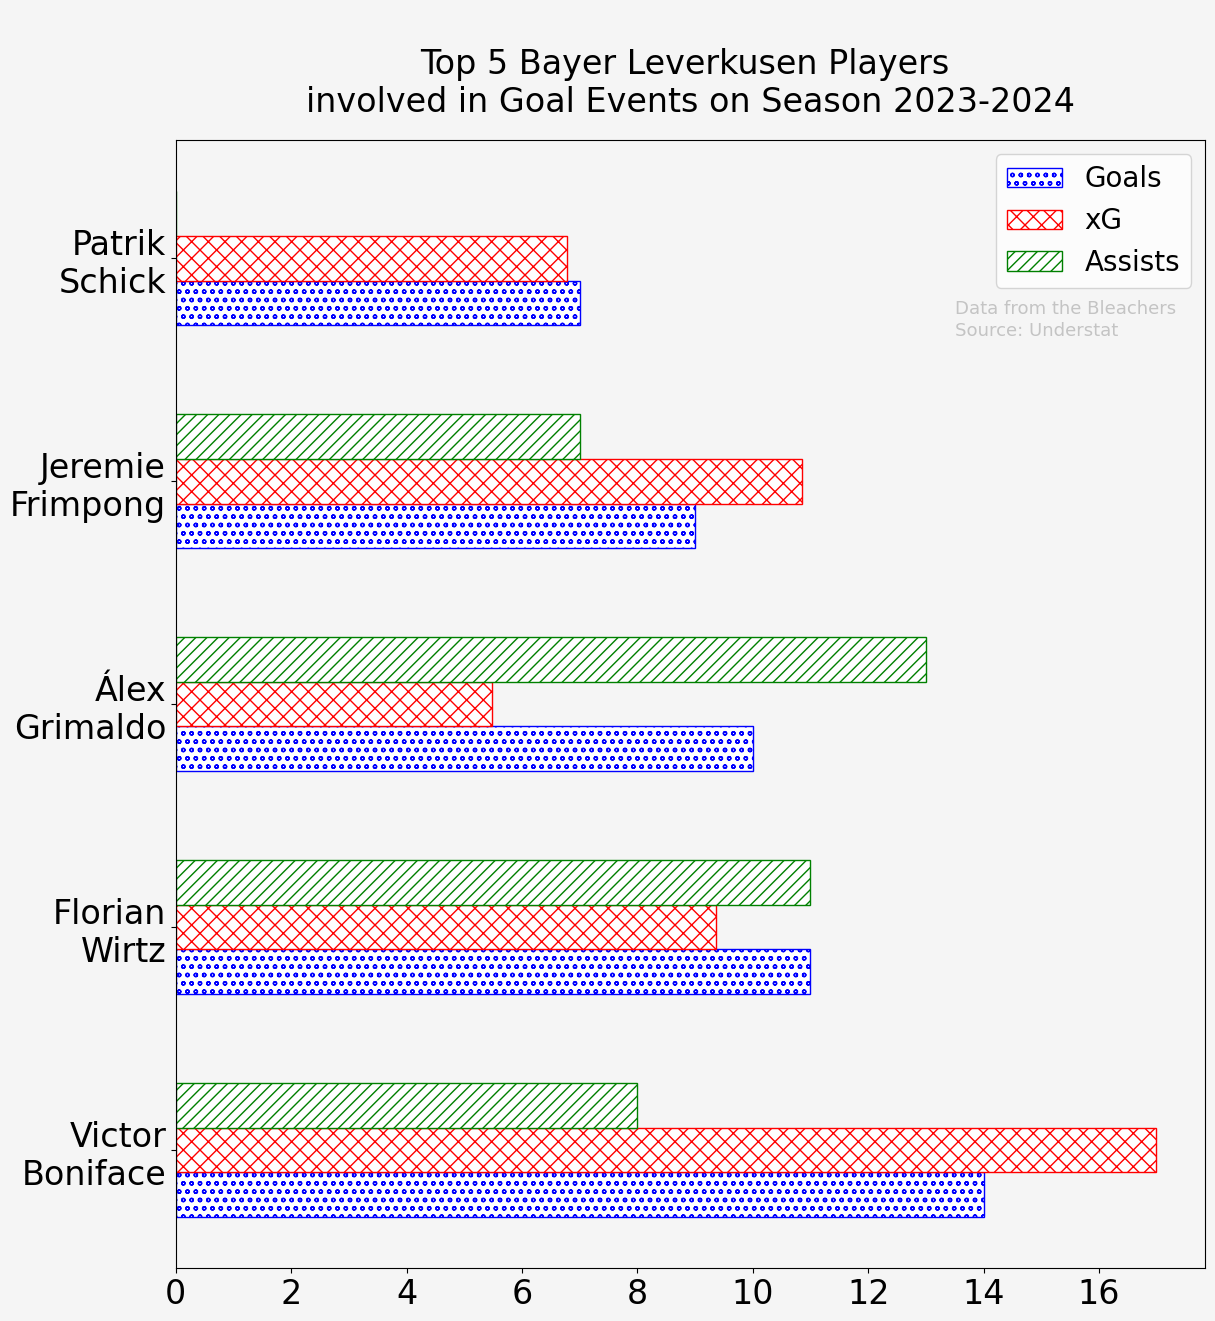

In [747]:
#Maybe the table is still not clear enough, so we present the result on a plot.

players = GoalEvents.index[0:5]
goals = GoalEvents['Goal'].head(5)
xG = GoalEvents['xG'].head(5)
assists = GoalEvents['Assist'].head(5)

# Create an array with the position of each bar along the y-axis
y_pos = np.arange(len(players))

# Set the DPI of the figure. The standard DPI for a screen is 100.
dpi = 100

# Calculate the size of the figure in inches (width x height)
figsize = (13.28, 16.28)
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

fig.set_facecolor('whitesmoke')
ax.patch.set_facecolor('whitesmoke')

# The width of the bars
width = 0.2

# Create the 'Goals' bars
ax.barh(y_pos - width, goals, width, color='w',edgecolor='b',  hatch='oo', label='Goals')

# Create the 'Assists' bars
ax.barh(y_pos, xG, width, color='w',edgecolor='r', hatch='xx',  label='xG')

# Create the 'xG' bars
ax.barh(y_pos + width, assists, width,color='w',edgecolor='g',  hatch='///',  label='Assists')

# Shrink current axis's height by 10% on the bottom to make room for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper right', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

# Set the y ticks in the middle of the bars
ax.set_yticks(y_pos)

# Set the y tick labels with the player names
yticklabels = players.str.split(' ').str.join('\n')

ax.set_yticklabels(yticklabels,fontsize=24)

# Set the x label
ax.tick_params(axis='x', labelsize=24)  # Change '10' to your desired font size for x axis
#ax.set_xlabel('Goal Events',fontsize=24)

# Set the title with different colors for "Goals", "xG" and "Assists"
from datetime import datetime # I don't know why, but the .now() keeps producing an error unless I Import datetime before.
title = '\nTop 5 ' + Team + ' Players \ninvolved in Goal Events on Season ' + str(datetime.now().year-1) + '-' + str(datetime.now().year)+'\n'
ax.text(0.5, 1.05, title, transform=ax.transAxes, ha='center', va='center', fontsize=24)

plt.text(13.5, 3.75, 'Data from the Bleachers', alpha=0.2,fontsize=13, color='black')
plt.text(13.5, 3.65, 'Source: Understat',alpha=0.2, fontsize=13, color='black')


ax.legend(loc='upper right',fontsize=20)

plt.show()

In [748]:
#Now for question #2 I create new DataFrames

#I did not figure out a better way, so I decided to reset_index to get the Players back as a column

Goals=dfStudy[dfStudy['Goal']==1]
Goals=Goals.groupby(['player','minute','Month'])[['Goal']].count().reset_index()

Assist=dfStudy[dfStudy['Assist']==1]
Assist=Assist.groupby(['player_assisted','minute','Month'])[['Assist']].count().reset_index()
dict = {'player_assisted': 'player'}
Assist.rename(columns=dict, inplace=True)

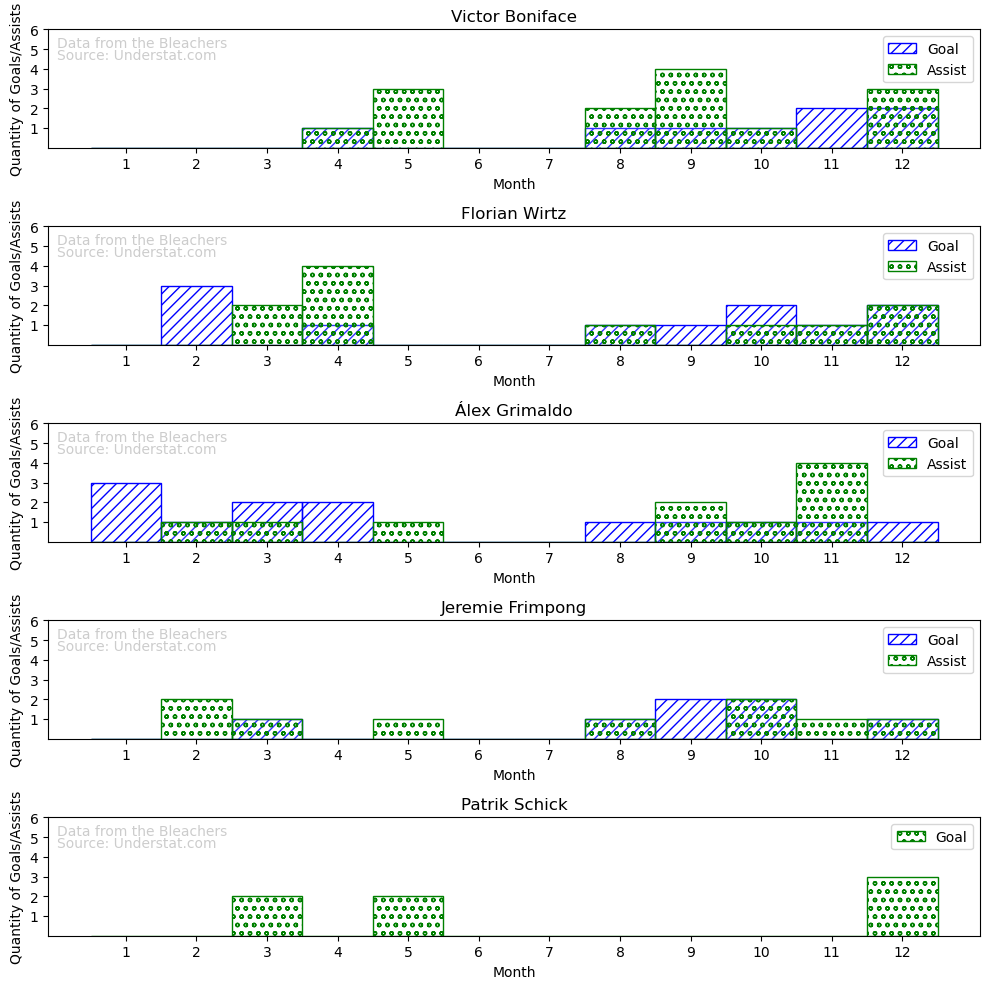

In [749]:
#Now, I create a second set of plots to understand the performance of the players month by month, but also 
#for every 10 minutes of play

fig, ax = plt.subplots(5, 1,figsize=(10,10))
month_bins = np.arange(0.5, 13, 1)
minute_bins = np.arange(0, 100, 10)  # bins edges from 0 to 90
i=0

GoalEvents= GoalEvents.reset_index()


#This for cycle creates a chart for every player on the Top 5. There probably is a better way and I can see
#this creating a problem if the dataframe is substantially larger, but I did not know how else to tackle the problem
for player in GoalEvents.head()['Player']:
    sns.histplot(x='Month', data=Assist[Assist['player']==player], ax=ax[i], bins=month_bins,color='w',hatch='///',edgecolor='b',alpha=0.2,label='Assist')
    sns.histplot(x='Month', data=Goals[Goals['player']==player], ax=ax[i], bins=month_bins,color='w',hatch='oo',edgecolor='g',alpha=0.2,label='Goal')
    plt.tight_layout()
    ax[i].set_title(player)
    ax[i].set_yticks(np.arange(1, 7, 1))
    ax[i].set_xticks(np.arange(1, 13, 1))
    ax[i].set_ylabel('Quantity of Goals/Assists')
    ax[i].legend(['Goal','Assist'])
    ax[i].text(0.01, 0.85, 'Data from the Bleachers', alpha=0.2, fontsize=10, color='black', transform=ax[i].transAxes)
    ax[i].text(0.01, 0.75, 'Source: Understat.com', alpha=0.2, fontsize=10, color='black', transform=ax[i].transAxes)
    i=i+1


plt.show()

#2) How is the performance of the 5 most influential players during the season (Month by month and by minutes played)

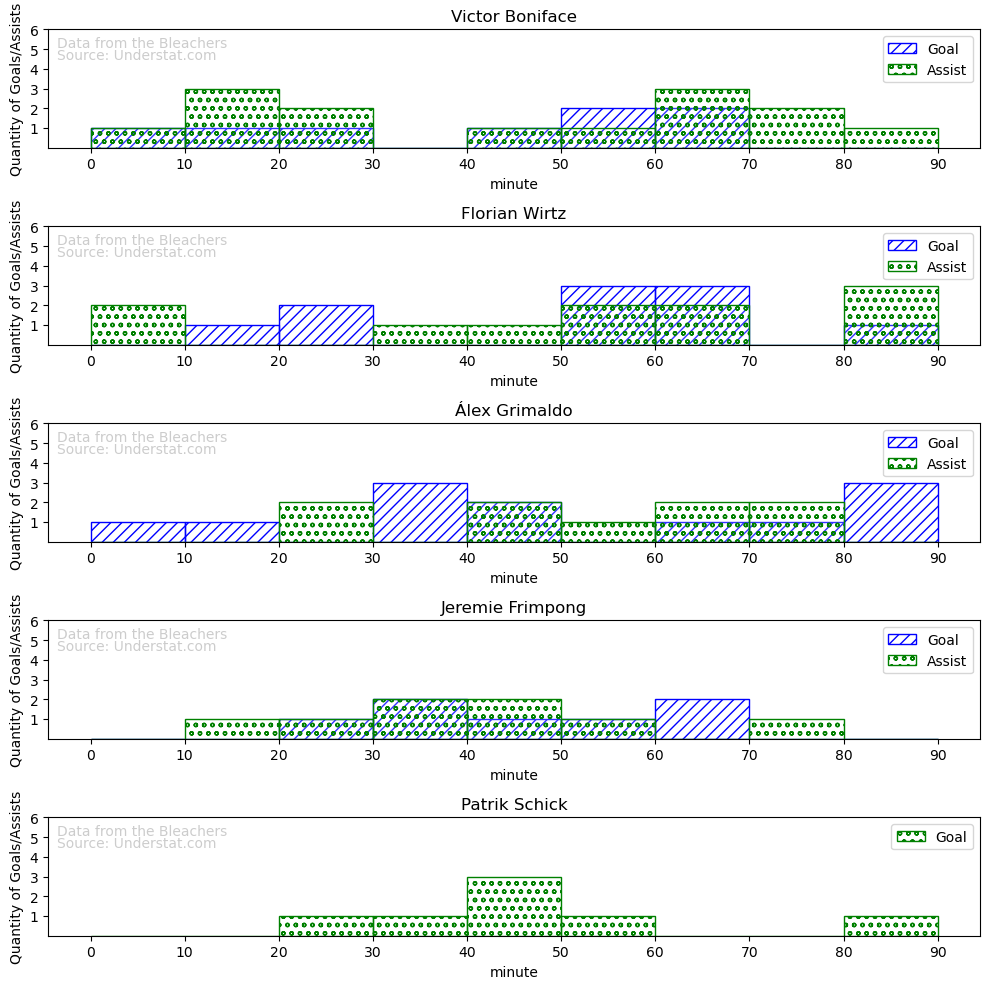

In [740]:
fig, ax = plt.subplots(5, 1,figsize=(10,10))
minute_bins = np.arange(0, 100, 10)  # bins edges from 0 to 90

i=0
for player in GoalEvents.head()['Player']:
    sns.histplot(x='minute', data=Assist[Assist['player']==player], ax=ax[i], bins=minute_bins,color='w',hatch='///',edgecolor='b',alpha=0.2,label='Assist')
    sns.histplot(x='minute', data=Goals[Goals['player']==player], ax=ax[i], bins=minute_bins,color='w',hatch='oo',edgecolor='g',alpha=0.2,label='Goal')
    plt.tight_layout()
    ax[i].set_title(player)
    ax[i].set_yticks(np.arange(1, 7, 1))
    ax[i].set_xticks(np.arange(0, 100, 10))
    ax[i].set_ylabel('Quantity of Goals/Assists')
    ax[i].legend(['Goal','Assist'])
    ax[i].text(0.01, 0.85, 'Data from the Bleachers', alpha=0.2, fontsize=10, color='black', transform=ax[i].transAxes)
    ax[i].text(0.01, 0.75, 'Source: Understat.com', alpha=0.2, fontsize=10, color='black', transform=ax[i].transAxes)
    i=i+1

plt.show()

#2) How is the performance of the 5 most influential players during the season (Month by month and by minutes played)

In [524]:
#I have to adjust the x and y to correctly fit the pitch in Python. 
#Very important: You will see this reflected later...Since we are plotting a VERTICAL field. X and Y will swap with each other
#Feel free to change the name of the column, I personally did not do it.

for index, row in df.iterrows():
    if df.loc[index,'Home_Away']=='h':
        df.loc[index,'x']=row['x']*120+1
        df.loc[index,'y'] = row['y']*70+5
        df.loc[index,'xG'] = row['xG']

    elif df.loc[index,'Home_Away']=='a':
        df.loc[index,'x']=row['x']*121
        df.loc[index,'y'] = row['y']*78
        df.loc[index,'xG'] = row['xG']

In [525]:
# Define the player that scores the most...

#Basically too forceful. Feel free to suggest changes
PlayerStudied = str(GoalEvents[GoalEvents['Goal']==GoalEvents['Goal'].max()]['Player'][0]) 

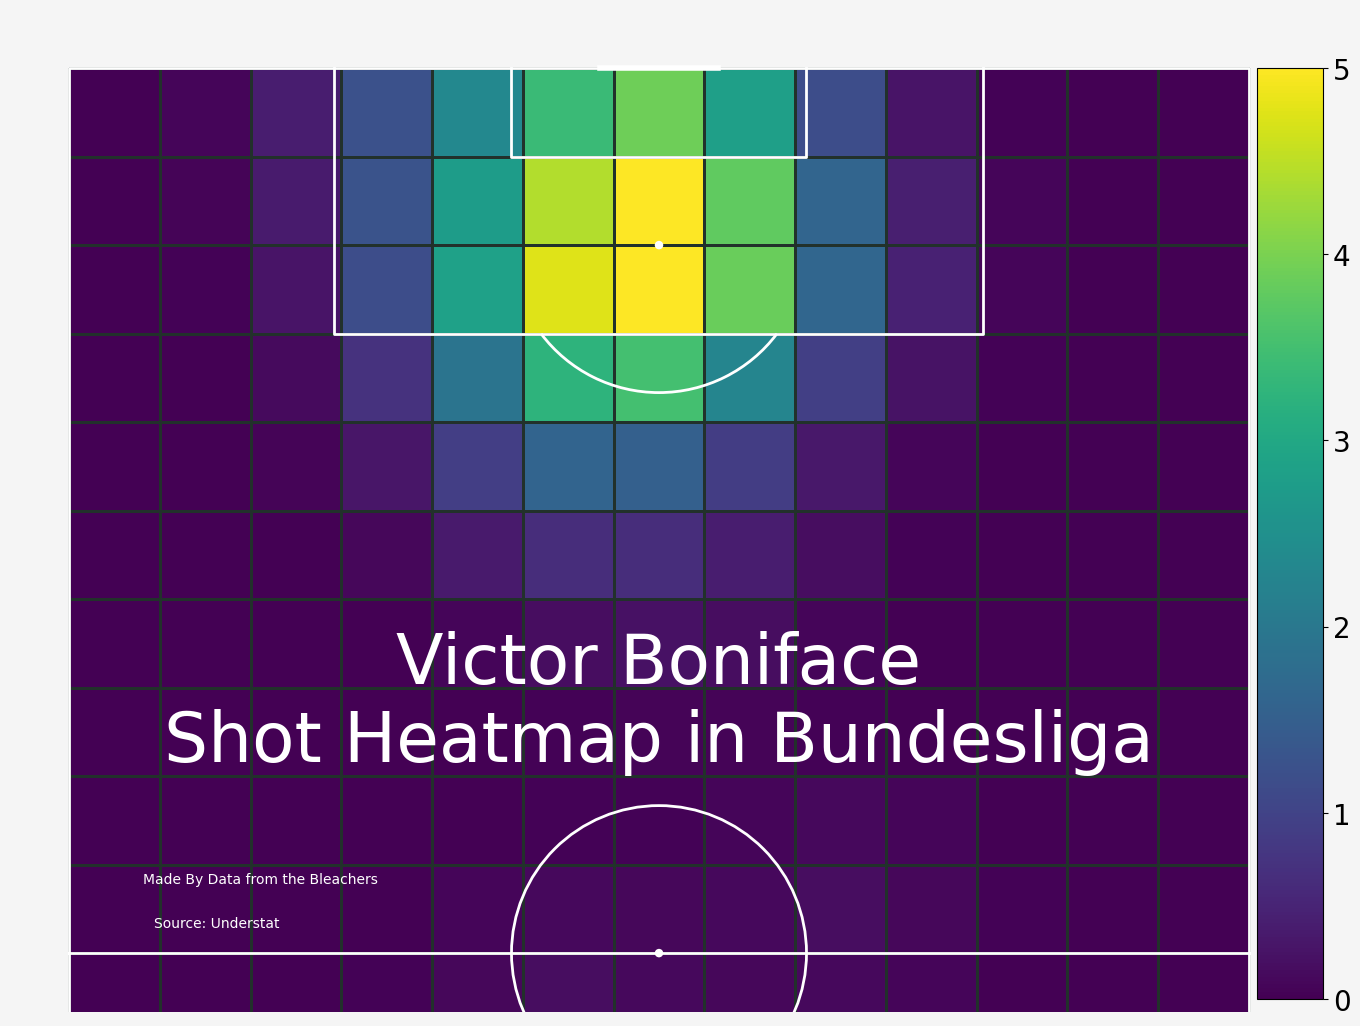

In [623]:
from scipy.ndimage import gaussian_filter
pitch = VerticalPitch(line_zorder=2,half=True,pitch_color='#22312b',line_color='white')
fig, ax = pitch.draw(figsize=(13.28, 16.28*2))

fig.set_facecolor('whitesmoke')
ax.patch.set_facecolor('whitesmoke')

PlayerStudy_Combined = dfStudy[dfStudy['player'] == PlayerStudied]

#Divide all shots in block around the field
bin_statistic = pitch.bin_statistic(PlayerStudy_Combined['x'], PlayerStudy_Combined['y'], statistic='count', bins=(20,13))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

#Turn it into a heatmap so it is visually appealing and easy to understand
pcm = pitch.heatmap_positional([bin_statistic], ax=ax, cmap='viridis', edgecolors='#22312b')
pcm[0].set_clim(0, 5)
ax.invert_xaxis()

# Calculate the total number of shots
total_shots = bin_statistic['statistic'].sum()

# Calculate the percentage for each bin
percentage = (bin_statistic['statistic'] / total_shots) * 100

########## Random Text #############
plt.text(40, 77, '\n' + PlayerStudied + '\nShot Heatmap in Bundesliga\n', fontdict={"fontsize": 50}, horizontalalignment="center", verticalalignment="center",c='white')
plt.text(67, 65, 'Made By Data from the Bleachers', fontsize=10, color='white', ha='center', va='center')
plt.text(70, 62, 'Source: Understat', fontsize=10, color='white', ha='center', va='center')


# Create a new axes for the colorbar at the desired position and size
cbar_ax = fig.add_axes([0.95, 0.35, 0.05, 0.286])  # [left, bottom, width, height]

# Add the colorbar to the new axes
cbar = fig.colorbar(pcm[0], cax=cbar_ax)
cbar.set_ticks([0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=20)
plt.show()

# 3) From the player that scores the most: Where does he prefers to shoot and also where does he score the most goals?

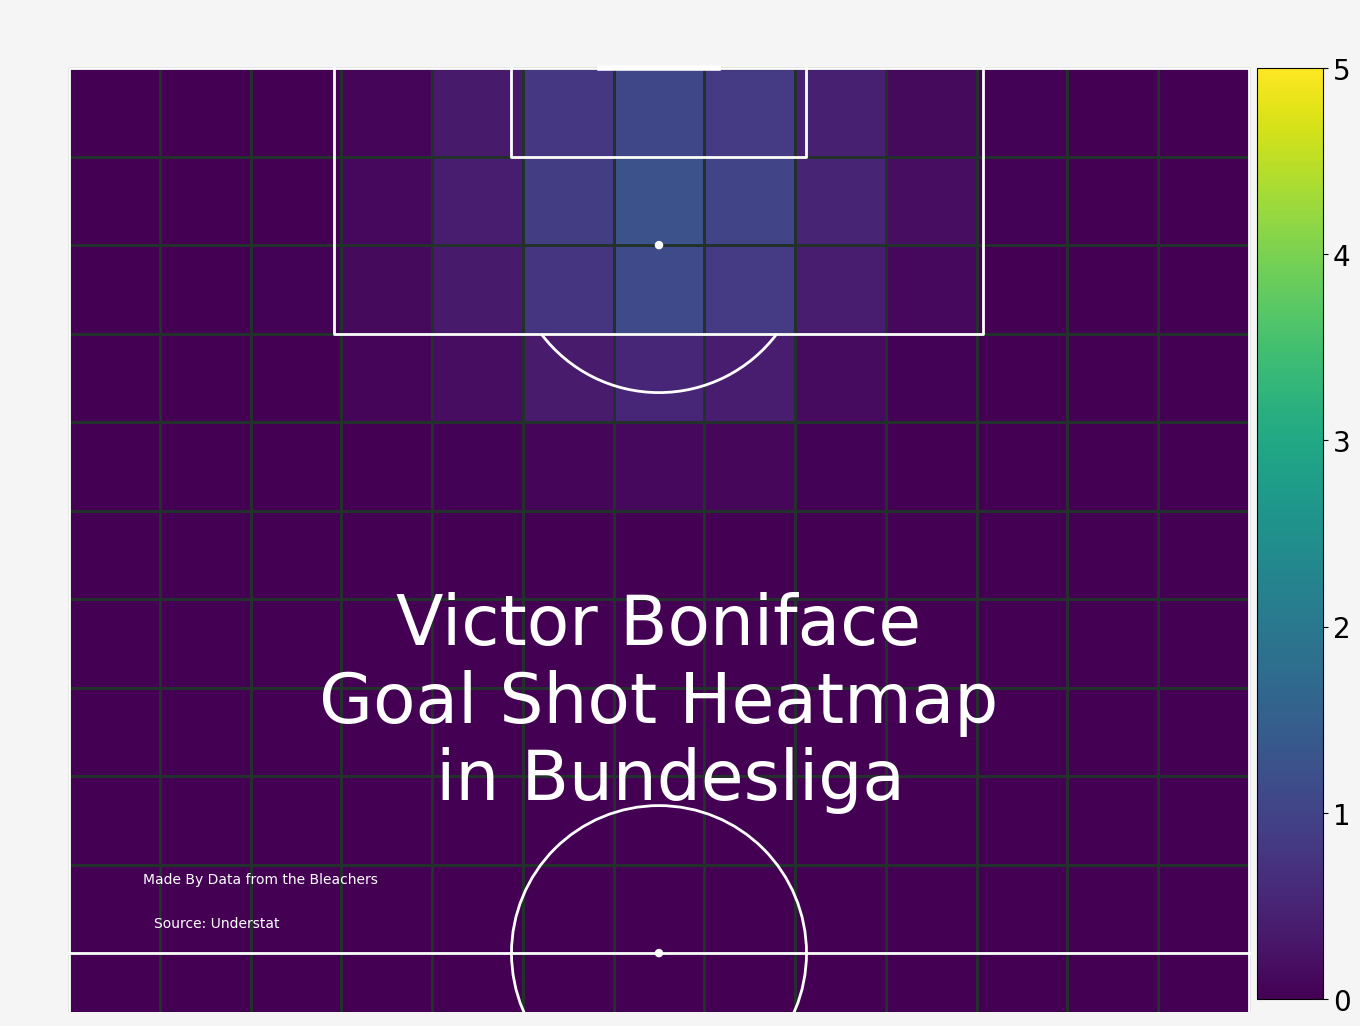

In [622]:
from scipy.ndimage import gaussian_filter
pitch = VerticalPitch(line_zorder=2,half=True,pitch_color='#22312b',line_color='white')
fig, ax = pitch.draw(figsize=(13.28, 16.28*2))

fig.set_facecolor('whitesmoke')
ax.patch.set_facecolor('whitesmoke')

GoalShots = dfStudy[dfStudy['Goal']==1]

PlayerStudy_Combined = GoalShots[GoalShots['player'] == PlayerStudied]

#Divide all shots in block around the field
bin_statistic = pitch.bin_statistic(PlayerStudy_Combined['x'], PlayerStudy_Combined['y'], statistic='count', bins=(20,13))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

#Turn it into a heatmap so it is visually appealing and easy to understand
pcm = pitch.heatmap_positional([bin_statistic], ax=ax, cmap='viridis', edgecolors='#22312b')
pcm[0].set_clim(0,5)
ax.invert_xaxis()

# Calculate the total number of shots
total_shots = bin_statistic['statistic'].sum()

# Calculate the percentage for each bin
percentage = (bin_statistic['statistic'] / total_shots) * 100

########## Random Text #############
plt.text(40, 77, '\n' + PlayerStudied + '\n Goal Shot Heatmap \n in Bundesliga\n', fontdict={"fontsize": 50}, horizontalalignment="center", verticalalignment="center",c='white')
plt.text(67, 65, 'Made By Data from the Bleachers', fontsize=10, color='white', ha='center', va='center')
plt.text(70, 62, 'Source: Understat', fontsize=10, color='white', ha='center', va='center')


# Create a new axes for the colorbar at the desired position and size
cbar_ax = fig.add_axes([0.95, 0.35, 0.05, 0.286])  # [left, bottom, width, height]

# Add the colorbar to the new axes
cbar = fig.colorbar(pcm[0], cax=cbar_ax)
cbar.set_ticks([0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=20)
plt.show()

# 3) From the player that scores the most: Where does he prefers to shoot and also where does he score the most goals?

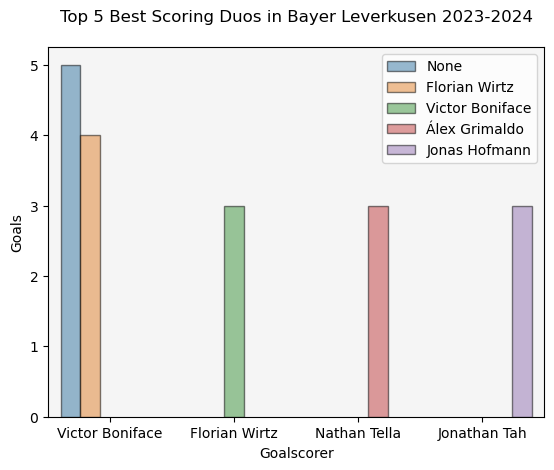

In [761]:
#Create a dataframe with just goal duos
duo_counts_Goals = GoalShots.groupby(['player', 'player_assisted']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
duo_counts_Goals

fig, ax = plt.subplots()

ax.set_facecolor('whitesmoke')
# Plot the first dataset
bar = sns.barplot(x='player', y='counts', data=duo_counts_Goals.head(), hue='player_assisted', edgecolor='black', alpha=0.5)

# Get the legend from the plot
legend = bar.legend_

# Set the title of the legend
legend.set_title('Assisted by')
bar.set_title('Top 5 Best Scoring Duos in ' + Team + " " + str(datetime.now().year-1) + '-' + str(datetime.now().year)+'\n')
bar.set_ylabel('Goals')
bar.set_xlabel('Goalscorer')
bar.legend(loc='upper right')

plt.show()

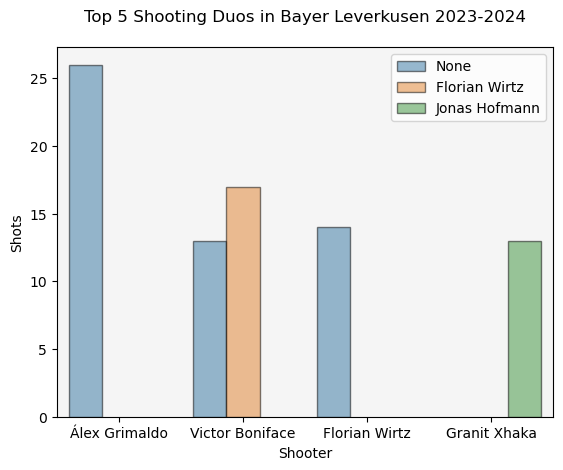

In [762]:
# 4) Extra (for fun): Who is the best "duo" of actions created?

duo_counts_Shots = dfStudy.groupby(['player', 'player_assisted']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)

fig, ax = plt.subplots()
ax.set_facecolor('whitesmoke')

# Plot the first dataset
bar = sns.barplot(x='player', y='counts', data=duo_counts_Shots.head(), hue='player_assisted', edgecolor='black', alpha=0.5)

# Get the legend from the plot
legend = bar.legend_

# Set the title of the legend
legend.set_title('Assisted by')
bar.set_title('Top 5 Shooting Duos in ' + Team + " " + str(datetime.now().year-1) + '-' + str(datetime.now().year)+'\n')
bar.set_ylabel('Shots')
bar.set_xlabel('Shooter')
bar.legend(loc='upper right')
plt.show()